In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
X_train.shape

(50000, 32, 32, 3)

In [38]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

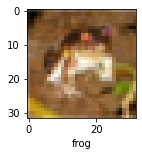

In [7]:
plot_sample(X_train, y_train, 0)

In [8]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# Try model
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4669 - accuracy: 0.4744
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1026 - accuracy: 0.6135
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9721 - accuracy: 0.6628
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8849 - accuracy: 0.6931
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8168 - accuracy: 0.7169


In [10]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.8917 - accuracy: 0.6919


[0.8916543126106262, 0.6919000148773193]

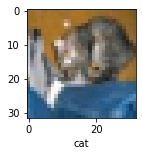

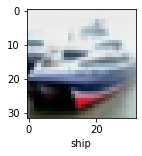

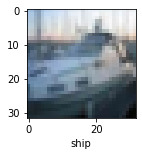

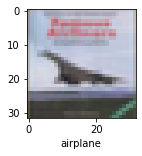

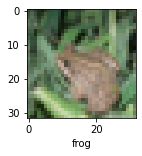

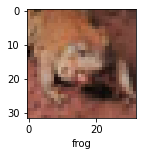

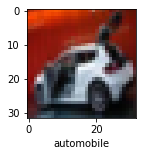

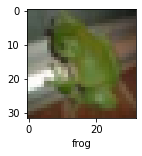

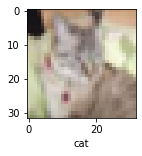

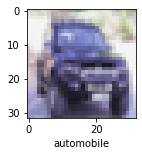

In [14]:
y_test = y_test.reshape(-1,)
for i in range(10):
    plot_sample(X_test, y_test, i)

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.00640776e-03, 2.13768193e-03, 9.80642159e-03, 8.64809394e-01,
        1.08811061e-03, 3.90875936e-02, 2.70886533e-02, 1.07617199e-03,
        4.66560274e-02, 5.24351327e-03],
       [2.01919172e-02, 8.75607133e-02, 2.72957277e-06, 1.70722069e-06,
        5.70194288e-06, 4.57159871e-07, 2.20791648e-07, 1.79499253e-07,
        8.91457796e-01, 7.78568326e-04],
       [3.10594976e-01, 1.12114638e-01, 7.18833704e-04, 2.84112222e-03,
        6.47825538e-04, 1.39344571e-04, 1.29627631e-04, 1.13251875e-03,
        5.47013521e-01, 2.46675946e-02],
       [9.41459358e-01, 9.51627176e-03, 4.83027520e-03, 5.93291188e-04,
        3.49158817e-03, 9.42524712e-05, 1.48167281e-04, 1.64651909e-04,
        3.95887978e-02, 1.13348950e-04],
       [1.13369415e-05, 5.95635684e-05, 8.96464288e-03, 8.30283388e-02,
        5.73783934e-01, 2.60392204e-03, 3.31113160e-01, 1.25202096e-05,
        4.16692666e-04, 5.86368469e-06]], dtype=float32)

In [24]:
y_classes = np.argmax(y_pred, axis=1)

In [26]:
y_classes[:5]

array([3, 8, 8, 0, 4], dtype=int64)

In [35]:
y_test[:30]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6], dtype=uint8)

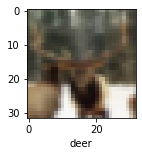

In [39]:
plot_sample(X_test, y_test, 26)

In [40]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']